In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

# Binomial


## KS TEST
 **HO**: The Binomial distribution has the same as the normal distribution <br>
**HA**: The Binomial distribution has a different distribution than the normal distrubtion
    
## AD TEST
**H0**: The binomial data comes from a distribution that follows a normal distribution <br>
**H1**: The binomial data does not come from a distribution that follows normal distribution


In [3]:
np.random.seed(999)

narray = sorted(np.random.randint(1, 1000, 100))
ks_s_b = np.zeros(len(narray))
ks_p_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
dist_n = np.random.randn(1000)
threshold = scipy.stats.anderson(dist_n, 
                                 dist='norm')[1][scipy.stats.anderson(dist_n, 
                                                                      dist='norm')[2]==[5.0]]


#loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    #run the tests. 
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    #print (scipy.stats.kstest(dist,'norm'))
    #print (scipy.stats.anderson(dist, dist='norm'))
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_b[i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], 
                                    scipy.stats.norm.pdf(bincenters) + n)


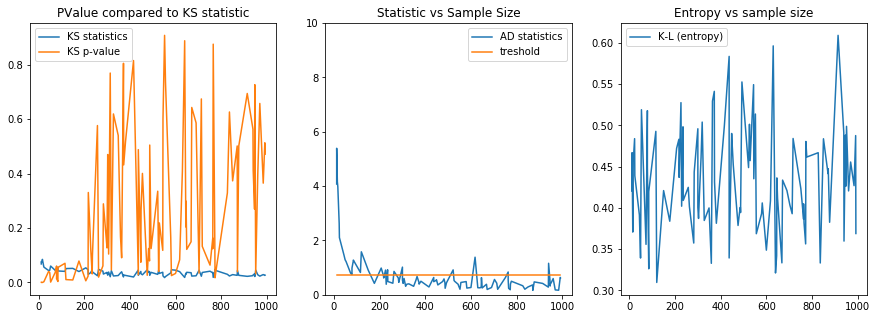

In [31]:
fig = plt.figure(figsize = (15,5))
fig.add_subplot(131)
plt.plot(narray, ks_s_b, label='KS statistics')
plt.plot(narray, ks_p_b, label='KS p-value')
plt.legend()
plt.title('PValue compared to KS statistic')
plt.xlabel('sample size')

fig.add_subplot(132)
plt.plot(narray, ad_b,  label='AD statistics')
plt.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
plt.ylim(0,10) #limit the y range or you cannot see the relevant part
plt.legend()
plt.title('Statistic vs Sample Size')


fig.add_subplot(133)
plt.plot(narray, kl_b, label='K-L (entropy)')
plt.title('Entropy vs sample size')

plt.legend();

# Poisson

## KS TEST
 **HO**: The Poisson distribution has the same as the normal distribution <br>
**HA**: The Poisson distribution has a different distribution than the normal distrubtion
    
## AD TEST
**H0**: The Poisson data comes from a distribution that follows a normal distribution <br>
**H1**: The Poisson data does not come from a distribution that follows normal distribution

In [24]:
#loop over the different values of n (or n and p)
for i,l in enumerate(narray):
    #generate the distribution
    dist = (np.random.poisson(l, 1000) - l) / np.sqrt(l)
    #run the tests. 
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    #print (scipy.stats.kstest(dist,'norm'))
    #print (scipy.stats.anderson(dist, dist='norm'))
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_b[i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], 
                                    scipy.stats.norm.pdf(bincenters) + n)

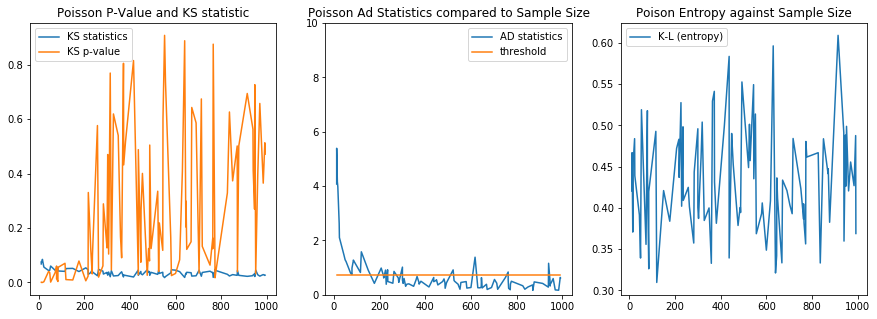

In [32]:
fig = plt.figure(figsize = (15,5))
fig.add_subplot(131)
plt.plot(narray, ks_s_b, label='KS statistics')
plt.plot(narray, ks_p_b, label='KS p-value')
plt.title('Poisson P-Value and KS statistic')

plt.legend()

fig.add_subplot(132)
plt.plot(narray, ad_b,  label='AD statistics')
plt.plot([narray[0], narray[-1]],[threshold, threshold], label="threshold")
plt.title('Poisson Ad Statistics compared to Sample Size')
plt.ylim(0,10) #limit the y range or you cannot see the relevant part
plt.legend()

fig.add_subplot(133)
plt.plot(narray, kl_b, label='K-L (entropy)')
plt.title('Poison Entropy against Sample Size')
plt.legend();

In [ ]:
pl.figure(figsize=(15,15))

q = lambda x, mu : scipy.stats.distributions.norm.pdf(x - mu)
p = lambda x, mu : scipy.stats.distributions.poisson.pmf(x, df=mu)
b = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu) * np.log10(q(x, mu)) + p(x, mu) * np.log10(p(x, mu))

def model(x) : 
    #gaussian model from scratch
    return 1. / (s * np.sqrt(2 * np.pi)) * np.exp(- ((x - m)**2 / 2. / s**2))

x = np.linspace(-10,10,100)
pl.plot(x, q(x, 1), label='norm')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

pl.plot(x, f(x,1), label='F')
pl.plot(x, Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(-10, 10)
pl.legend(fontsize = 20);

In [30]:
scipy.stats.kstest?